# **Encoding**

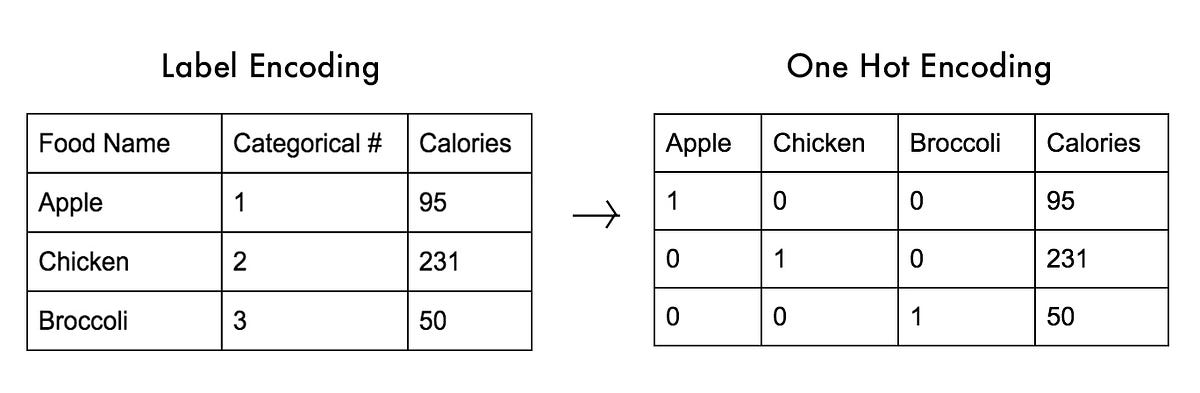

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Dummy dataset
df = pd.DataFrame({
    "Size": ["Small", "Medium", "Large", "Medium", "Small"]
})
print("Original Data:\n", df, "\n")

Original Data:
      Size
0   Small
1  Medium
2   Large
3  Medium
4   Small 



In [ ]:
# Apply Label Encoding
le = LabelEncoder()
df["Size_Label"] = le.fit_transform(df["Size"])
print("After Label Encoding:\n", df)

After Label Encoding:
      Size  Size_Label
0   Small           2
1  Medium           1
2   Large           0
3  Medium           1
4   Small           2


In [ ]:
# Dummy dataset
df = pd.DataFrame({
    "Color": ["Red", "Blue", "Green", "Blue", "Red"]
})
print("Original Data:\n", df, "\n")

Original Data:
    Color
0    Red
1   Blue
2  Green
3   Blue
4    Red 



In [ ]:
# Apply One-Hot Encoding
df_onehot = pd.get_dummies(df, columns=["Color"])
print("After One-Hot Encoding:\n", df_onehot)

After One-Hot Encoding:
    Color_Blue  Color_Green  Color_Red
0       False        False       True
1        True        False      False
2       False         True      False
3        True        False      False
4       False        False       True


# **Feature Scaling**

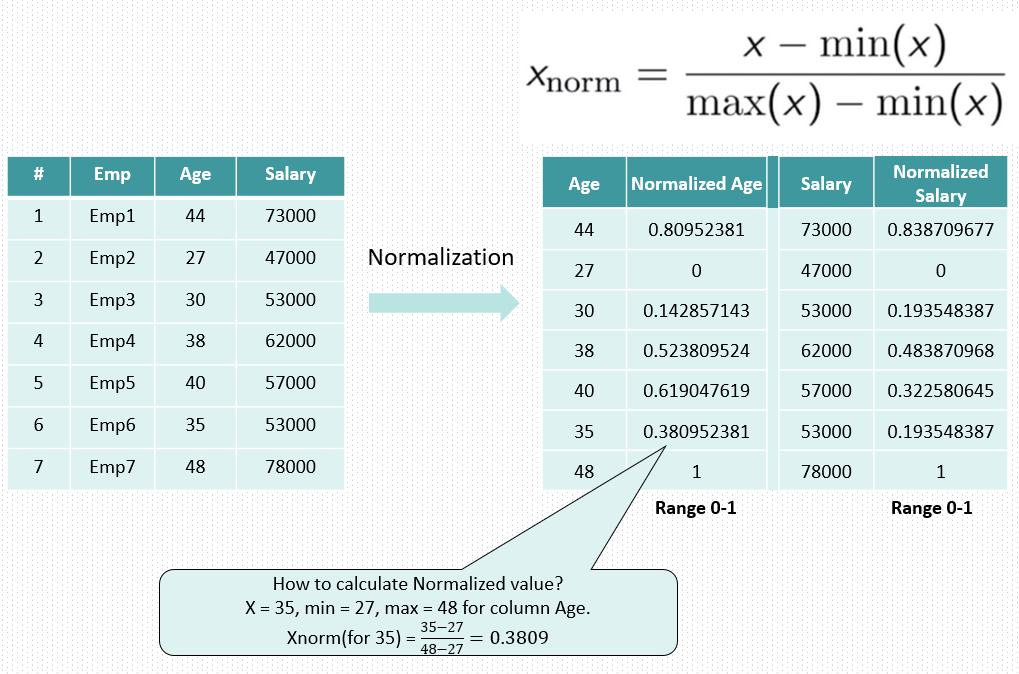

If values are not clustered around a mean, just spread out unevenly → Normalization.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#skicit library
#sklearn.preprocessing(module)
#MinMaxScaler (class)
# Example dataset
data = {
    "Age": [20, 30, 40],
    "Salary": [20000, 40000, 100000]
}
df = pd.DataFrame(data)
print("Before Min-Max Scaling:\n", df)

Before Min-Max Scaling:
    Age  Salary
0   20   20000
1   30   40000
2   40  100000


In [ ]:
# Apply Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# df_scaled=scaler.fit_transform(df)
print("Without scaling original dataframe:\n",df)
print("\nAfter Min-Max Scaling:\n", df_scaled)

Without scaling original dataframe:
    Age  Salary
0   20   20000
1   30   40000
2   40  100000

After Min-Max Scaling:
    Age  Salary
0  0.0    0.00
1  0.5    0.25
2  1.0    1.00


When to use Standardization

If your data looks like a bell curve (Gaussian) → most values are around the average, only a few are very small or very large.

Example: human heights, exam scores in a large class, sensor readings.

Standardization makes sense here because shifting to mean = 0 and std = 1 keeps the natural shape.

👉 In short: use when data is normally distributed (or close to it).

***Standardization***

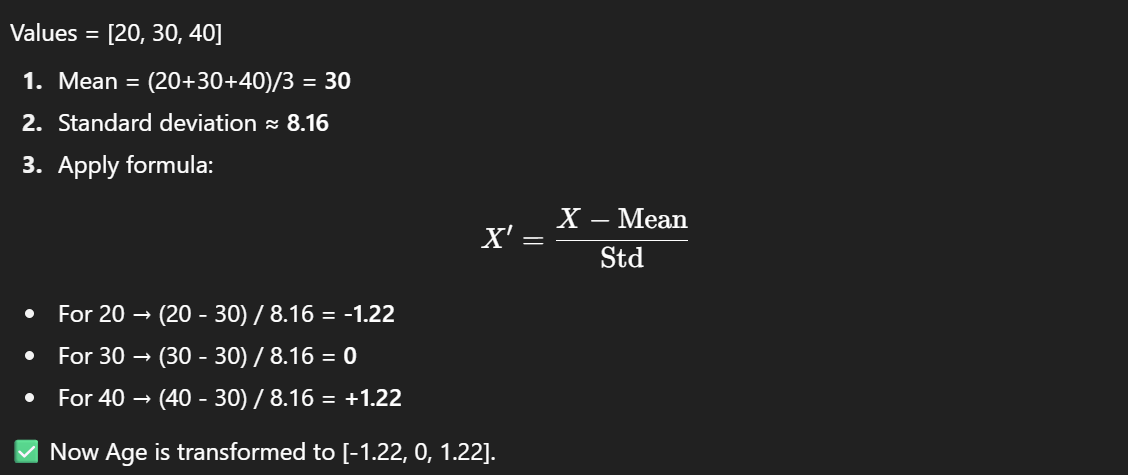

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example dataset
data = {
    "Age": [20, 30, 40],
    "Salary": [20000, 40000, 100000]
}
df = pd.DataFrame(data)
print("Before Standardization:\n", df)

Before Standardization:
    Age  Salary
0   20   20000
1   30   40000
2   40  100000


In [ ]:
# Apply Standardization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("\nAfter Standardization:\n", df_scaled)


After Standardization:
         Age    Salary
0 -1.224745 -0.980581
1  0.000000 -0.392232
2  1.224745  1.372813


# **OUTLIER**

<Axes: ylabel='Marks'>

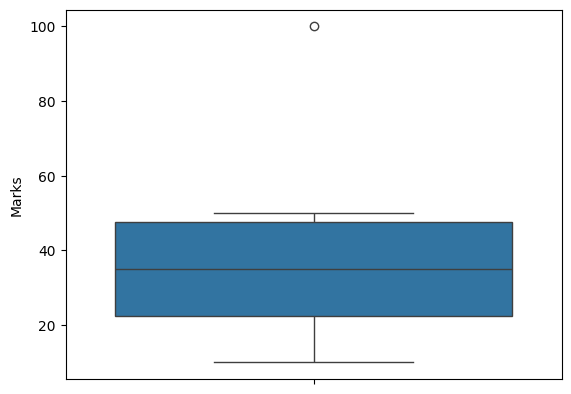

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = pd.DataFrame({"Marks": [10, 20, 30, 40, 50, 100]})

# Boxplot
sns.boxplot(data=data, y="Marks") #seaborn made on top of matplotlib(enhanced version of that,high level api)
# plt.show() #optional to write in colab or jupyter environemnt but mandatory in .py file

***IQR(Interquartile Range)***

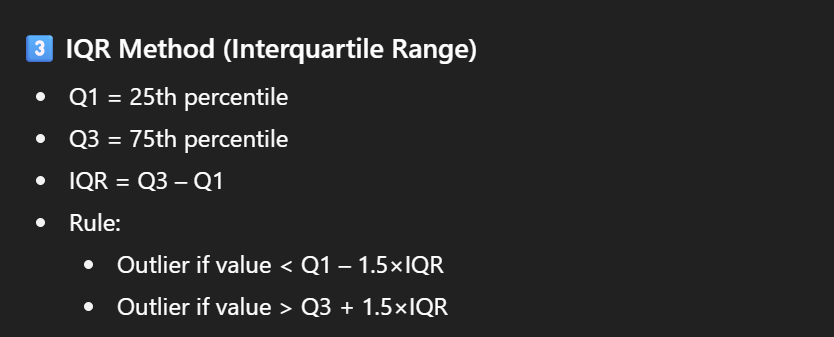

![image.png]()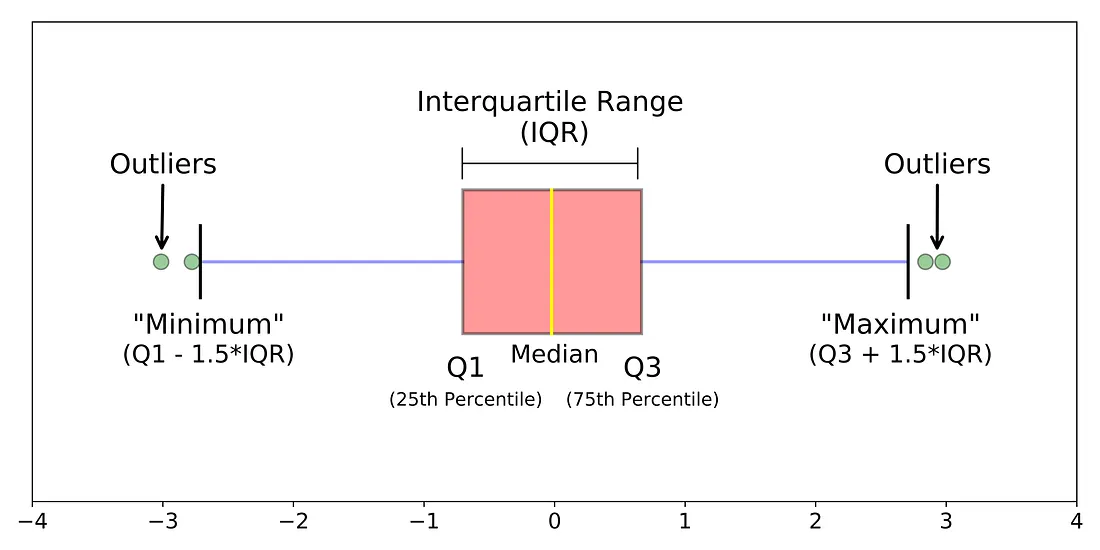

In [ ]:
Q1 = data["Marks"].quantile(0.25)
Q3 = data["Marks"].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data["Marks"] < Q1 - 1.5*IQR) | (data["Marks"] > Q3 + 1.5*IQR)]
print("Outliers:\n", outliers)

Outliers:
    Marks
5    100
